<a href="https://colab.research.google.com/github/CHANDINIADARI/FMML_COURSE_ASSIGNMENT/blob/main/FMML_Module_5_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
from tqdm import tqdm

In [ ]:
!gdown --id 1aOtOWPQ30Uy8ENx2comEc2afVwyDX-QL

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aOtOWPQ30Uy8ENx2comEc2afVwyDX-QL
To: /content/fingerDataSet.pickle
100% 18.4M/18.4M [00:00<00:00, 30.2MB/s]


In [ ]:
with open("/content/fingerDataSet.pickle", "rb") as infile:
    dat = pickle.load(infile, encoding="bytes")

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
dat[0].keys()

dict_keys([b'box', b'boxHeight', b'handPoints', b'trackingIndices', b'allFingerPoints', b'boxWidth', b'image', b'boxEdges', b'croppedImage', b'numFingers', b'numPointsInBox', b'handEdges', b'indexFingerPoints', b'picCount', b'image1bit'])

In [ ]:
def highlightPoints(img, pts, color = "yellow"):
    draw = ImageDraw.Draw(img)
    for y, x in pts:
        draw.point((x, y), fill = color)

In [ ]:
imDat = dat[50]
for key, item in imDat.items():
    try:
        print(key, type(item), item.shape)
    except:
        print(key, type(item), item)

b'box' <class 'numpy.ndarray'> (202, 2)
b'middleFingerPoints' <class 'numpy.ndarray'> (61, 2)
b'handPoints' <class 'numpy.ndarray'> (621, 2)
b'trackingIndices' <class 'dict'> {b'1': {b'tipIndices': (array([206, 207, 208]), array([183, 183, 183])), b'baseIndices': (array([213, 213, 214, 214, 215]), array([185, 186, 185, 186, 185]))}, b'3': {b'tipIndices': (array([204, 204, 205, 205, 206, 206]), array([200, 201, 200, 201, 200, 201])), b'baseIndices': (array([213, 214, 215]), array([199, 199, 199]))}, b'2': {b'tipIndices': (array([203, 204, 205]), array([192, 192, 192])), b'baseIndices': (array([211, 212, 213]), array([192, 192, 192]))}}
b'allFingerPoints' <class 'numpy.ndarray'> (187, 2)
b'boxWidth' <class 'numpy.int64'> ()
b'image' <class 'numpy.ndarray'> (400, 400)
b'boxEdges' <class 'list'> [173, 211, 192, 253]
b'croppedImage' <class 'numpy.ndarray'> (61, 38)
b'numFingers' <class 'int'> 3
b'numPointsInBox' <class 'numpy.int64'> ()
b'handEdges' <class 'list'> [181, 203, 200, 245]
b'ind

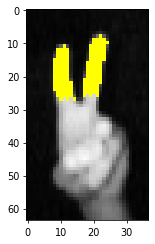

In [ ]:
imDat = dat[32]
img = Image.fromarray(imDat[b'croppedImage'])
img = img.convert(mode="RGB")
newFingerPoints = [(y - min(imDat[b"box"][:,0]), x - min(imDat[b"box"][: , 1])) for y, x in imDat[b"allFingerPoints"]]
# highlightPoints(img, [(173, 211), (192, 253)])
highlightPoints(img, newFingerPoints)
# highlightPoints(img, imDat[b"box"], "blue")


imshow(img)
plt.gcf().set_dpi(70)

In [ ]:
FILTER = 11

In [ ]:
class PointDat:
    def __init__(self, imgAr, isFinger : bool, coor = None, idx = None):
        self.imgAr = imgAr
        self.isFinger = isFinger
        self.idx = idx
        self.coor = coor
    
    def __str__(self):
        return "Coors {} on idx {}".format(self.coor, self.idx)
    
    def data(self):
        return self.imgAr.reshape(-1)
    
    def getPointGrid(self):
        return self.imgAr
    
    def getBoolean(self):
        return self.isFinger
    
    def getCoors(self):
        return self.coor

In [ ]:
def highlightPoints(img, pts, color = "yellow"):
    draw = ImageDraw.Draw(img)
    for y, x in pts:
        draw.point((x, y), fill = color)
        
class ImgDat:
    def __init__(self, dat, idx = None):
        self.idx = idx
        self.fullImage = dat[b"image"]
        self.box = dat[b"box"]
        self.topLeft = (int(min(dat[b"box"][:, 0])), int(min(dat[b"box"][:, 1])))
        self.bottomRight = (int(max(dat[b"box"][:, 0])), int(max(dat[b"box"][:, 1])))

        self.bitImage = dat[b"image1bit"][self.topLeft[0]:self.bottomRight[0], self.topLeft[1]:self.bottomRight[1]]
        self.numFingers = dat[b"numFingers"]
        self.boundImage = dat[b"croppedImage"]

        self.fingerPoints = [(p1 - self.topLeft[0], p2 - self.topLeft[1]) for p1, p2 in dat[b"allFingerPoints"]]
    
    def showImage(self):
        img = Image.fromarray(self.boundImage)
        img = img.convert(mode = "RGB")
        return img
                              
    def showFingers(self):
        COLS = ["orange", "pink", "lime"]
        img = Image.fromarray(self.boundImage)
        img = img.convert(mode = "RGB")
        highlightPoints(img, self.fingerPoints, COLS[self.numFingers - 1])
        return img
    
    def showFullImage(self):
        img = Image.fromarray(self.fullImage)
        img = img.convert(mode = "RGB")
        highlightPoints(img, self.box, "yellow")
        return img
    
    def makePointsDataset(self):
        F = FILTER//2
        
        collection = []
        for r in range(F, self.bitImage.shape[0] - F):
            for c in range(F, self.bitImage.shape[1] - F):
#                 collection.append([self.bitImage[r-F:r+F, c-F:c+F], (r, c) in self.fingerPoints, (r, c)])
                collection.append(PointDat(self.bitImage[r - F : r + F+1, c - F: c + F+1], (r, c) in self.fingerPoints, (r, c),\
                                            self.idx))
        
        return np.array(collection, dtype=object)
                
        

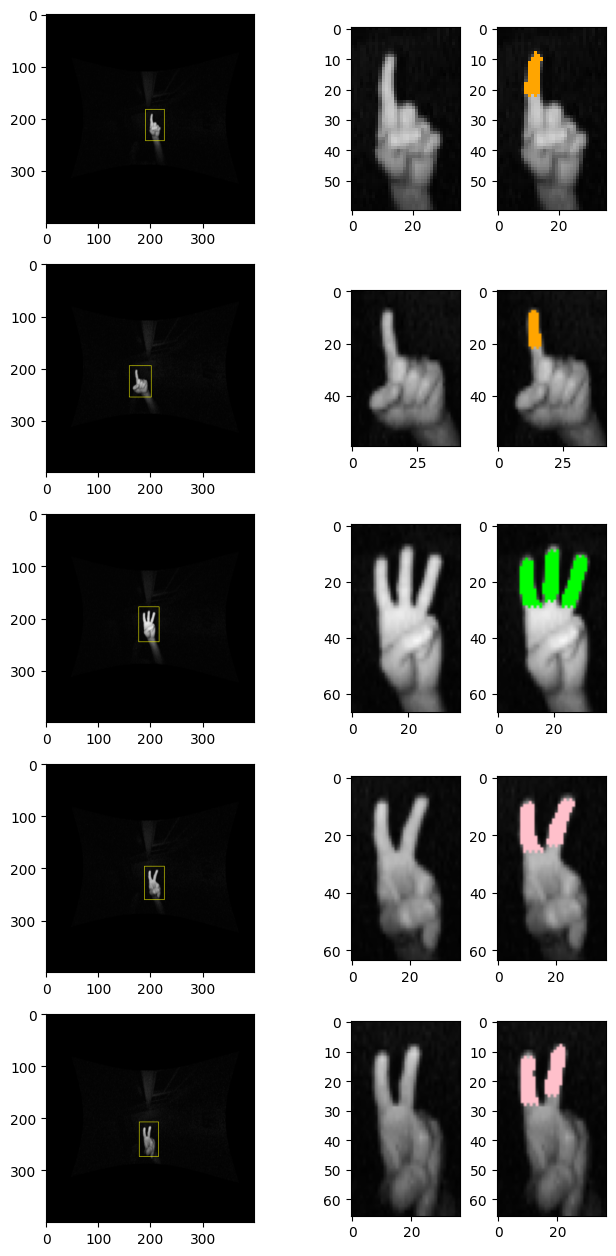

In [ ]:
sampleIndices = [0, 10, 52, 30, 40]
fig, axs = plt.subplots(5, 3, figsize=(8, 16), gridspec_kw={'width_ratios': [3, 1, 1]})
for r in range(5):
    p = ImgDat(dat[sampleIndices[r]], sampleIndices[r])
    axs[r][0].imshow(p.showFullImage())
    axs[r][1].imshow(p.showImage())
    axs[r][2].imshow(p.showFingers())
fig.set_dpi(100)

In [ ]:
p = ImgDat(dat[52], 52)
d = p.makePointsDataset()

In [ ]:
posPoints = [point for point in d if point.getBoolean()]
negPoints = [point for point in d if not point.getBoolean()]


### Positive Datapoints for grids that are finger points

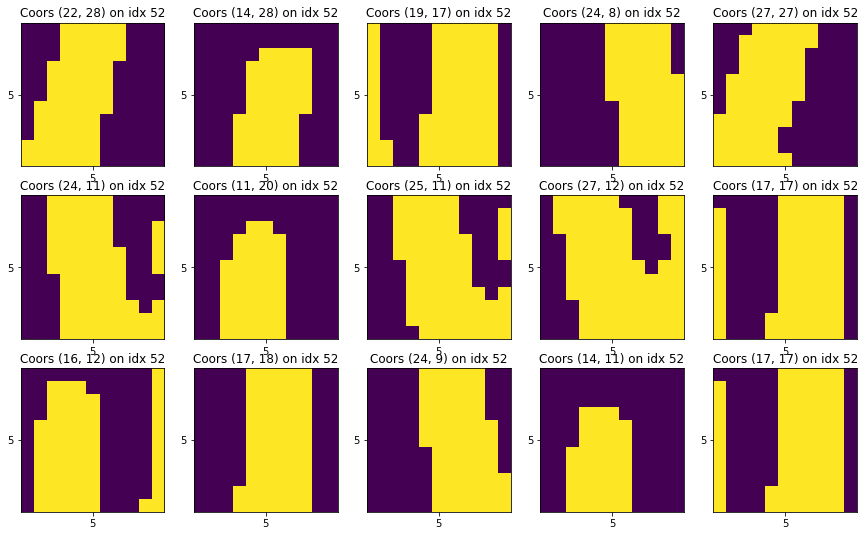

In [ ]:
np.random.seed(0)
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
for ax in axs:
    for a in ax:
        point = np.random.choice(posPoints)
        a.imshow(point.getPointGrid())
        a.title.set_text(str(point))
        a.set_xticks([FILTER//2])
        a.set_yticks([FILTER//2])

### Negative Datapoints for grids that are not finger points

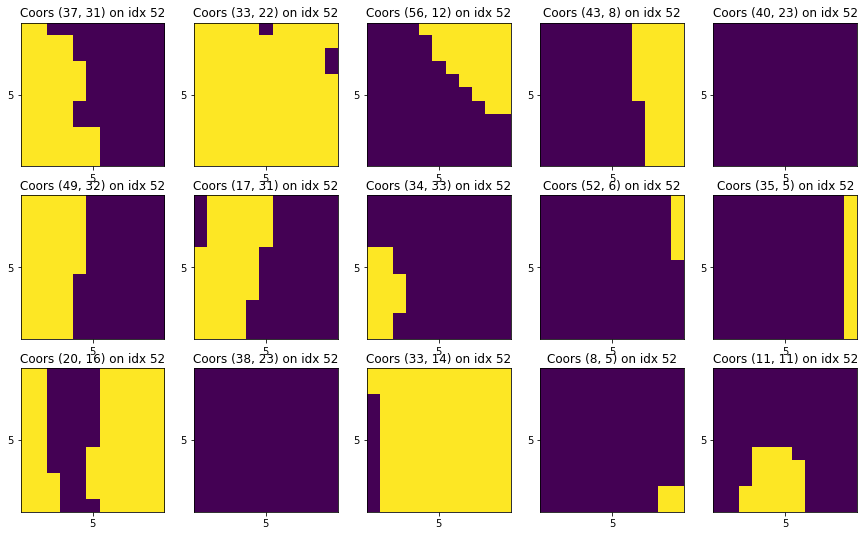

In [ ]:
np.random.seed(0)
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
for ax in axs:
    for a in ax:
        point = np.random.choice(negPoints)
        a.imshow(point.getPointGrid())
        a.title.set_text(str(point))
        a.set_xticks([FILTER//2])
        a.set_yticks([FILTER//2])

### Creating a method to cluster the points together and predict the number of fingers based on the number of clusters

In [ ]:
def singleton(cls, *args, **kw):
    instances = {}
    def _singleton(*args, **kw):
        if cls not in instances:
            instances[cls] = cls(*args, **kw)
        return instances[cls]
    return _singleton

@singleton
class fingersFromPoints:
    
    def findAdjacent(self, coordinates, coordinate, cluster):
        distances = np.sqrt(np.sum((coordinates-coordinate)**2,1))
        newCoordIndices = np.where(np.logical_and(distances<1.3, distances >0))[0]

        for newCoordIndex in newCoordIndices:
            if newCoordIndex not in cluster:
                cluster.append(newCoordIndex)
                self.findAdjacent(coordinates, coordinates[newCoordIndex, :], cluster)
                
    def findClusters(self, coordinates):
        allIndices = np.arange(len(coordinates))
        clusters = []

        while len(allIndices) > 0:

            cluster = [allIndices[0]]
            self.findAdjacent(coordinates, coordinates[allIndices[0],:], cluster)
            allIndices = np.setdiff1d(allIndices, np.array((cluster)))
            clusters.append(cluster)

        return clusters
    
    def findClusterCoors(self, coors):
        
        clusters = self.findClusters(coors)
        newClus = []
        for c in clusters:
            temp = []
            for idx in c:
                temp.append(coors[idx])
            newClus.append(temp)
        return newClus    
    
    def countFingers(self, clusters, minFingerSize = 15, fingerCutoff = 0.5):
        sizes = []
        for cluster in clusters:
            sizes.append(len(cluster))

        sizes = np.array(sizes)

        if len(sizes) > 0:
            if np.max(sizes) > minFingerSize:
                fingerCluster = np.argmax(sizes)
                numFingers = sum(sizes>fingerCutoff*sizes[fingerCluster])
            else:
                numFingers = 0
        else:
            numFingers = 0

        return numFingers
    
    def predictNumFingers(self, coors):
        newCoors = np.array(coors)
        clusters = self.findClusters(newCoors)
        #print(clusters)
        return self.countFingers(clusters)
    

### Checking if the clustering is working with a datapoint

In [ ]:
predObj = fingersFromPoints()

imgObj = ImgDat(dat[52], 52)

assert imgObj.numFingers == predObj.predictNumFingers(imgObj.fingerPoints), "Clustering has failed for the dataimage \
with index {}. Something is wrong! {} is being predicted instead of {})".format(imgObj.idx, predObj.predictNumFingers(imgObj.fingerPoints),\
                                                                               imgObj.numFingers)


### Checking the accuracy over all the datapoints

In [ ]:
cor, tot = 0, 0
incor = []
for idx, d in enumerate(dat):
    imgObj = ImgDat(d, idx)
    if imgObj.numFingers == predObj.predictNumFingers(imgObj.fingerPoints):
        cor += 1
    else:
        incor.append(imgObj)
    tot += 1

print("The Clustering is correct for: {:.2f} % of the datapoints' ground truth".format(cor * 100 / tot))

The Clustering is correct for: 96.30 % of the datapoints' ground truth


The Answer is wrong for:

In [ ]:
print(len(incor))

2


### Let us examine on why are two of the input images are clustered incorrectly

Incorrect for 42
Incorrect for 45


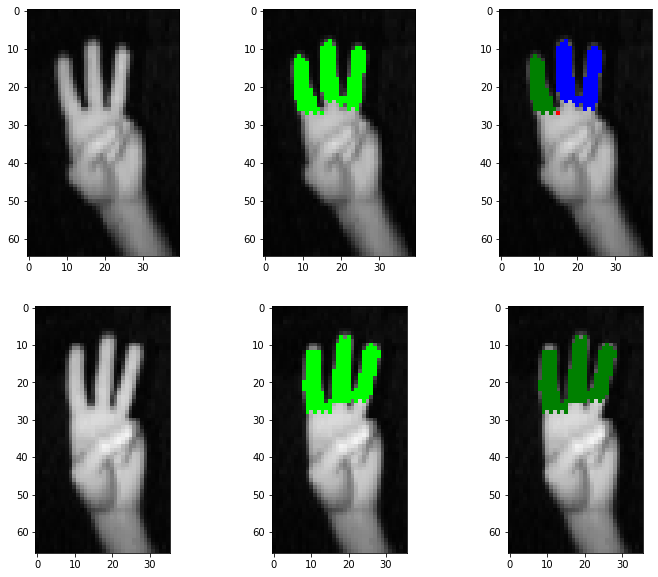

In [ ]:
fig, axs = plt.subplots(2, 3, figsize = (12, 10))
incorIndices = []
for idx, (ax, imObj) in enumerate(zip(axs, incor)):
    print("Incorrect for {}".format(imObj.idx))
    incorIndices.append(imObj.idx)
    ax[0].imshow(imObj.showImage())
    ax[1].imshow(imObj.showFingers())
    img = imObj.showImage()
    clusters = predObj.findClusterCoors(np.array(imObj.fingerPoints))
    COLS = ["green", "red", "blue", "yello", "orange", "pink"]
    for idx2, c in enumerate(clusters):
        highlightPoints(img, c, COLS[idx2])
    ax[2].imshow(img)

In [ ]:
allImg = [ImgDat(d, idx) for idx, d in enumerate(dat)]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainImg, testImg = train_test_split(allImg, test_size = 10, train_size = 44, random_state = 0)

In [ ]:
trainPoints = np.array([], dtype=object)
for imgObj in tqdm(trainImg):
    trainPoints = np.append(trainPoints, imgObj.makePointsDataset())

100%|██████████| 44/44 [00:01<00:00, 23.57it/s]


In [ ]:
testPoints = np.array([], dtype=object)
for imgObj in tqdm(testImg):
    testPoints = np.append(testPoints, imgObj.makePointsDataset())

100%|██████████| 10/10 [00:00<00:00, 25.80it/s]


In [ ]:
X_train, y_train = np.array([p.data() for p in trainPoints]), np.array([p.getBoolean() for p in trainPoints])
X_test, y_test = np.array([p.data() for p in testPoints]), np.array([p.getBoolean() for p in testPoints])

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70206, 121) (70206,)
(15045, 121) (15045,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0, max_depth = 3)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#Training Error in terms of points:
from sklearn.metrics import accuracy_score
print("{:.2f} % of the training points classified correctly".format(100*accuracy_score(clf.predict(X_train), y_train)))

95.86 % of the training points classified correctly


### Testing Decision Tree Accurcy with Depth


In [ ]:
dt_accuracy_train = []
dt_accuracy_test = []
max_depth_list = [x for x in range(2, 21)]
for max_depth in max_depth_list:
  clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
  clf.fit(X_train, y_train)
  acc_train = accuracy_score(clf.predict(X_train), y_train)
  acc_test = accuracy_score(clf.predict(X_test), y_test)
  dt_accuracy_train.append(acc_train)
  dt_accuracy_test.append(acc_test)
  print("[info] Max Depth = {}| Train Accuracy: {:.2f}, Test Accuracy: {:.2f}".format(max_depth, acc_train*100, acc_test*100))

[info] Max Depth = 2| Train Accuracy: 91.40, Test Accuracy: 89.03
[info] Max Depth = 3| Train Accuracy: 95.86, Test Accuracy: 95.16
[info] Max Depth = 4| Train Accuracy: 97.01, Test Accuracy: 96.42
[info] Max Depth = 5| Train Accuracy: 97.83, Test Accuracy: 97.18
[info] Max Depth = 6| Train Accuracy: 98.05, Test Accuracy: 97.41
[info] Max Depth = 7| Train Accuracy: 98.23, Test Accuracy: 97.62
[info] Max Depth = 8| Train Accuracy: 98.55, Test Accuracy: 97.72
[info] Max Depth = 9| Train Accuracy: 98.83, Test Accuracy: 97.98
[info] Max Depth = 10| Train Accuracy: 99.00, Test Accuracy: 97.83
[info] Max Depth = 11| Train Accuracy: 99.14, Test Accuracy: 97.75
[info] Max Depth = 12| Train Accuracy: 99.28, Test Accuracy: 97.74
[info] Max Depth = 13| Train Accuracy: 99.40, Test Accuracy: 97.73
[info] Max Depth = 14| Train Accuracy: 99.49, Test Accuracy: 97.67
[info] Max Depth = 15| Train Accuracy: 99.58, Test Accuracy: 97.65
[info] Max Depth = 16| Train Accuracy: 99.65, Test Accuracy: 97.65
[in

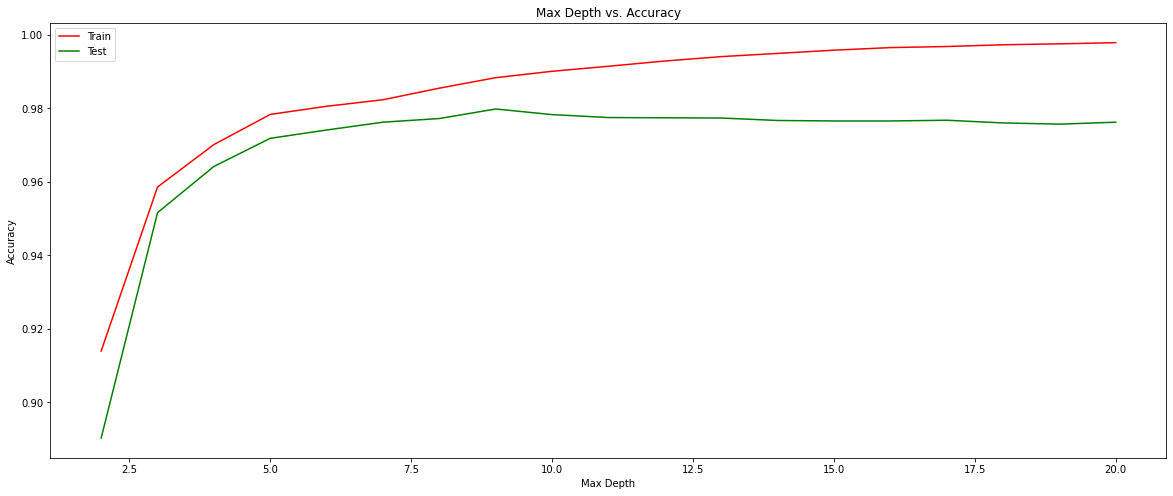

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Max Depth vs. Accuracy for Decision Tree")
plt.title("Max Depth vs. Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(max_depth_list, dt_accuracy_train, 'r', label="Train")
plt.plot(max_depth_list, dt_accuracy_test, 'g', label="Test")
plt.legend()
plt.show()

In [ ]:
mx_depth_idx = -1
for idx in range(1, len(dt_accuracy_train)):
  if dt_accuracy_train[idx-1] < dt_accuracy_train[idx] and dt_accuracy_test[idx-1] < dt_accuracy_test[idx]:
    mx_depth_idx = idx
  else:
    break

print(f"Max Depth required is {max_depth_list[mx_depth_idx]} with train accuracy of {round(dt_accuracy_train[mx_depth_idx], 2)} and test accuracy of {round(dt_accuracy_test[mx_depth_idx], 2)}")

Max Depth required is 9 with train accuracy of 0.99 and test accuracy of 0.98


**Best Max Depth for Decision Tree is 9 which has an accuracy of 0.99 for train and 0.98 for test**

### Now lets us try it on the 10 test images

Predicted correctly for idx : 53, the number: 3
Predicted correctly for idx : 33, the number: 2
Predicted correctly for idx : 48, the number: 3
Predicted correctly for idx : 26, the number: 2
Predicted correctly for idx : 11, the number: 1
Predicted correctly for idx : 2, the number: 1
Predicted correctly for idx : 32, the number: 2
Predicted correctly for idx : 42, the number: 3
Predicted correctly for idx : 45, the number: 3
Predicted correctly for idx : 30, the number: 2


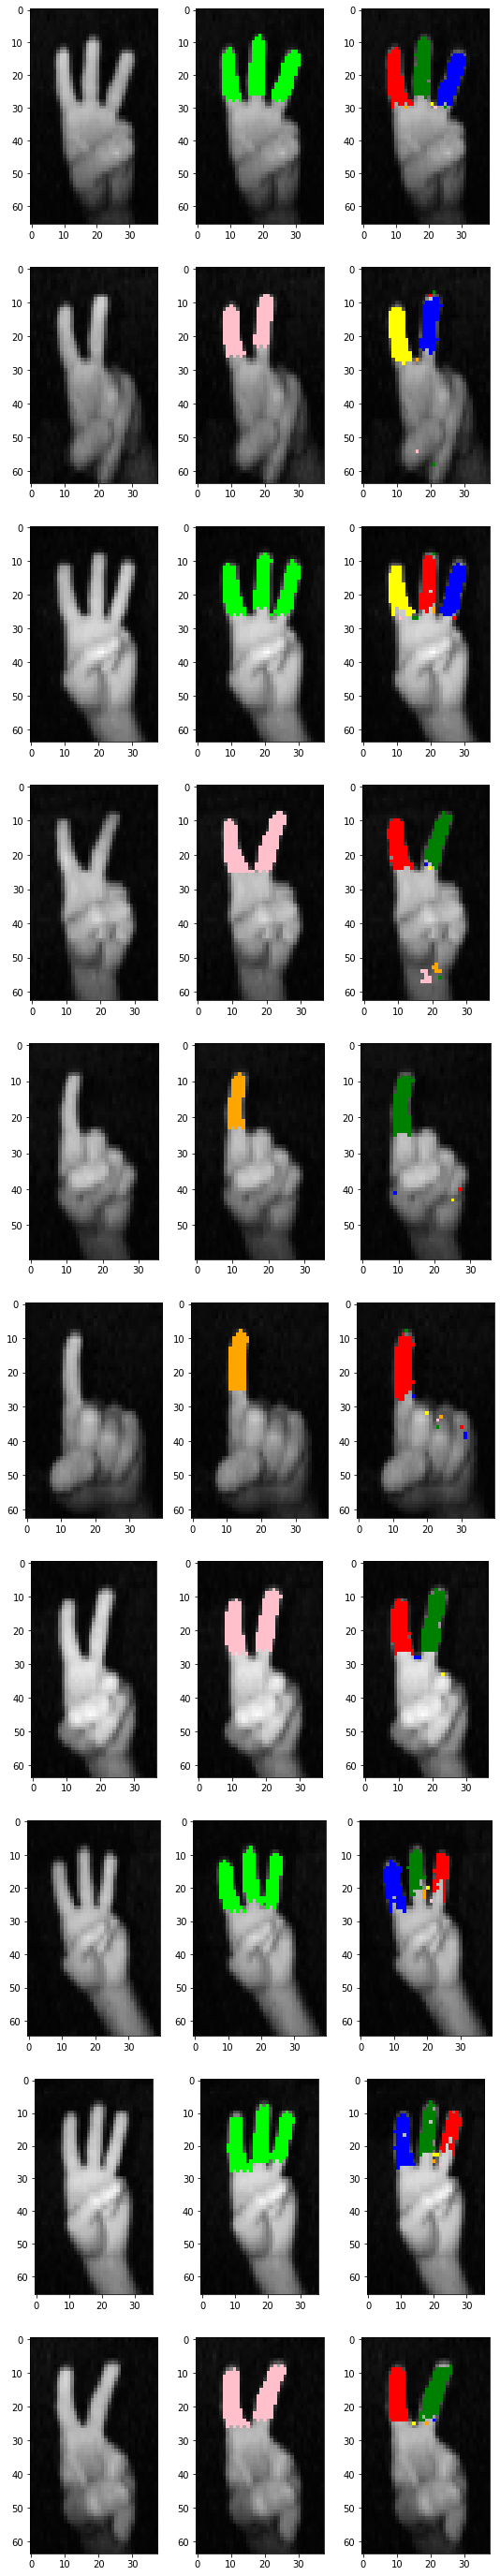

In [ ]:
fig, axs = plt.subplots(10, 3, figsize = (9, 50))
for idx, imgObj in enumerate(testImg):
    testPoints = imgObj.makePointsDataset()
    axs[idx][0].imshow(imgObj.showImage())
    axs[idx][1].imshow(imgObj.showFingers())
    
    coors = []
    for point in testPoints:
        if clf.predict([point.data()])[0]:
            coors.append(point.getCoors())
    clusters = predObj.findClusterCoors(np.array(coors))
#     clusters = sorted(clusters, key = lambda c : len(c))
#     clusters = clusters[::-1]
#     clusters = clusters[:5]
    img = imgObj.showImage()
    COLS = ["green", "red", "blue", "yellow", "orange", "pink"]
    for idx2, c in enumerate(clusters):
#         pass
        highlightPoints(img, c, COLS[idx2%6])
    axs[idx][2].imshow(img)
    if predObj.predictNumFingers(coors) == imgObj.numFingers:
        print("Predicted correctly for idx : {}, the number: {}".format(imgObj.idx, imgObj.numFingers))
    else:
        print("Predicted incorrectly for idx : {}, the number: {}".format(imgObj.idx, imgObj.numFingers))
#     print("Num clusters seen: {}".format(len(clusters)))
        

In [ ]:
from sklearn import tree

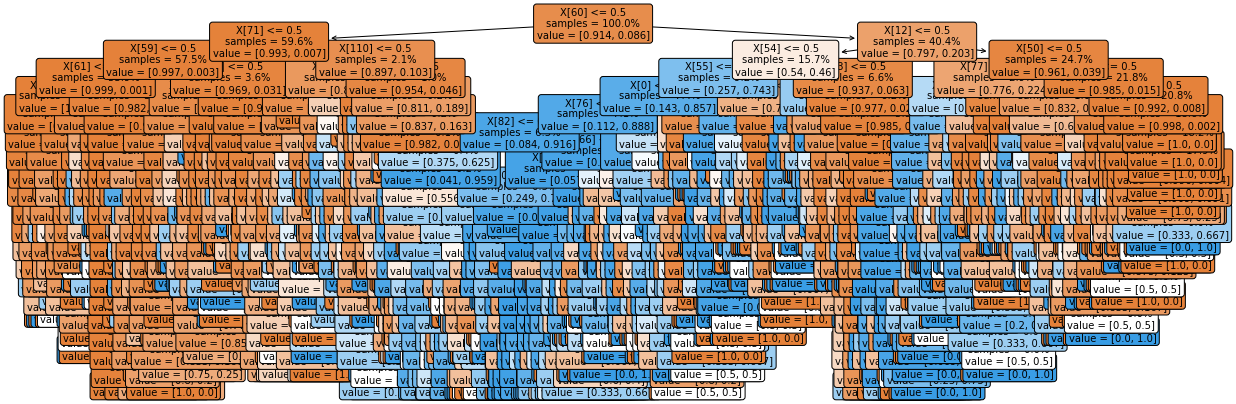

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
imgObj = tree.plot_tree(clf, filled=True, ax=ax, impurity=False, proportion=True, rounded=True, fontsize = 10)
plt.show()

### Testing Random Forest Accurcy with Depth


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
print("{:.2f} % of the training points classified correctly".format(100*accuracy_score(clf.predict(X_train), y_train)))

91.40 % of the training points classified correctly


In [ ]:
rf_accuracy_train = []
rf_accuracy_test = []
max_depth_list = [x for x in range(2, 21)]
for max_depth in max_depth_list:
  clf = RandomForestClassifier(max_depth=max_depth, random_state=0)
  clf.fit(X_train, y_train)
  acc_train = accuracy_score(clf.predict(X_train), y_train)
  acc_test = accuracy_score(clf.predict(X_test), y_test)
  rf_accuracy_train.append(acc_train)
  rf_accuracy_test.append(acc_test)
  print("[info] Max Depth = {}| Train Accuracy: {:.2f}, Test Accuracy: {:.2f}".format(max_depth, acc_train*100, acc_test*100))

[info] Max Depth = 2| Train Accuracy: 91.40, Test Accuracy: 89.03
[info] Max Depth = 3| Train Accuracy: 96.07, Test Accuracy: 94.45
[info] Max Depth = 4| Train Accuracy: 97.46, Test Accuracy: 96.38
[info] Max Depth = 5| Train Accuracy: 98.01, Test Accuracy: 97.16
[info] Max Depth = 6| Train Accuracy: 98.32, Test Accuracy: 97.61
[info] Max Depth = 7| Train Accuracy: 98.59, Test Accuracy: 97.99
[info] Max Depth = 8| Train Accuracy: 98.78, Test Accuracy: 98.15
[info] Max Depth = 9| Train Accuracy: 98.88, Test Accuracy: 98.24
[info] Max Depth = 10| Train Accuracy: 99.02, Test Accuracy: 98.25
[info] Max Depth = 11| Train Accuracy: 99.13, Test Accuracy: 98.33
[info] Max Depth = 12| Train Accuracy: 99.25, Test Accuracy: 98.34
[info] Max Depth = 13| Train Accuracy: 99.34, Test Accuracy: 98.33
[info] Max Depth = 14| Train Accuracy: 99.47, Test Accuracy: 98.27
[info] Max Depth = 15| Train Accuracy: 99.56, Test Accuracy: 98.32
[info] Max Depth = 16| Train Accuracy: 99.66, Test Accuracy: 98.27
[in

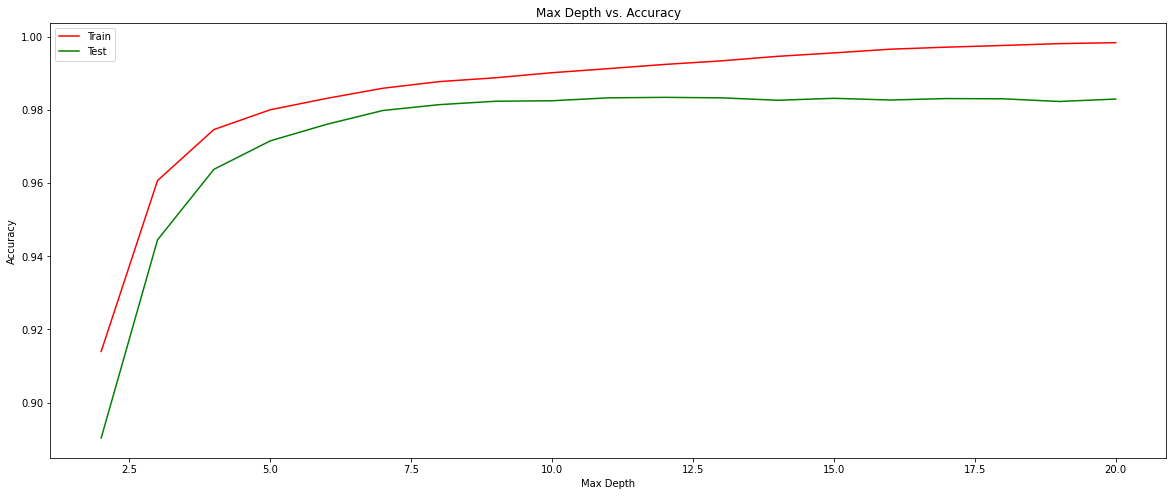

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Max Depth vs. Accuracy for Random Forest")
plt.title("Max Depth vs. Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(max_depth_list, rf_accuracy_train, 'r', label="Train")
plt.plot(max_depth_list, rf_accuracy_test, 'g', label="Test")
plt.legend()
plt.show()

In [ ]:
mx_depth_idx = -1
for idx in range(1, len(rf_accuracy_train)):
  if rf_accuracy_train[idx-1] < rf_accuracy_train[idx] and rf_accuracy_test[idx-1] < rf_accuracy_test[idx]:
    mx_depth_idx = idx
  else:
    break

print(f"Max Depth required is {max_depth_list[mx_depth_idx]} with train accuracy of {round(rf_accuracy_train[mx_depth_idx], 2)} and test accuracy of {round(rf_accuracy_test[mx_depth_idx], 2)}")

Max Depth required is 12 with train accuracy of 0.99 and test accuracy of 0.98


**Best Max Depth for Random Forest is 12 which has an accuracy of 0.99 for train and 0.98 for test**

Visualizing the decision maker:

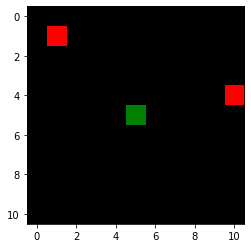

In [ ]:
blank = np.ones((11, 11))
img = Image.fromarray(blank)
img = img.convert(mode="RGB")

imDraw = ImageDraw.Draw(img)
imDraw.point((12%11, 12//11), fill = "red")
imDraw.point((54%11, 54//11), fill = "red")
imDraw.point((60%11, 60//11), fill = "green")
plt.imshow(img)